In [1]:
import io
%cd "E:\Imarticus\PGA18\PYTHON"

E:\Imarticus\PGA18\PYTHON


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [4]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [5]:
hrtest["is_promoted"]="test"

In [6]:
combinedf=pd.concat([hrtrain,hrtest],axis=0)

In [7]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [8]:
from sklearn.impute import SimpleImputer 

In [9]:
imp=SimpleImputer(strategy='most_frequent')

In [10]:
objcolsimp=imp.fit(objcols)

In [11]:
objcolsimp=imp.transform(objcols)

In [12]:
objcolsimp=pd.DataFrame(objcolsimp,columns=objcols.columns)

In [13]:
numcolsimp=imp.fit(numcols)

In [14]:
numcolsimp=imp.transform(numcols)

In [15]:
numcolsimp=pd.DataFrame(numcolsimp,columns=numcols.columns)

In [16]:
numcolsimp.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [17]:
objcolsimp.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'is_promoted'],
      dtype='object')

In [18]:
numcolsimp['is_promoted']=objcolsimp.is_promoted

In [19]:
numcolsimp.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [20]:
numcolsimp

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0
1,65141.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0
2,7513.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0
3,2542.0,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0
4,48945.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0
...,...,...,...,...,...,...,...,...,...
78293,53478.0,1.0,24.0,3.0,1.0,0.0,0.0,61.0,test
78294,25600.0,1.0,31.0,3.0,7.0,0.0,0.0,74.0,test
78295,45409.0,1.0,26.0,4.0,4.0,0.0,0.0,50.0,test
78296,1186.0,3.0,27.0,3.0,1.0,0.0,0.0,70.0,test


In [21]:
objcolsimp=objcolsimp.drop('is_promoted',axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
objcolsdummy=objcolsimp.apply(le.fit_transform)

In [25]:
numcolsimp.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0
1,65141.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0
2,7513.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0
3,2542.0,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0
4,48945.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0


In [26]:
numcolsimp.previous_year_rating=le.fit_transform(numcolsimp.previous_year_rating)

In [27]:
numcolsimp["KPIs_met >80%"]=le.fit_transform(numcolsimp["KPIs_met >80%"])

In [28]:
numcolsimp["awards_won?"]=le.fit_transform(numcolsimp["awards_won?"])

In [29]:
combinedfimp=pd.concat([numcolsimp,objcolsdummy],axis=1)

In [30]:
combinedfimp

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438.0,1.0,35.0,4,8.0,1,0,49.0,0,7,31,2,0,2
1,65141.0,1.0,30.0,4,4.0,0,0,60.0,0,4,14,0,1,0
2,7513.0,1.0,34.0,2,7.0,0,0,50.0,0,7,10,0,1,2
3,2542.0,2.0,39.0,0,10.0,0,0,50.0,0,7,15,0,1,0
4,48945.0,1.0,45.0,2,2.0,0,0,73.0,0,8,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478.0,1.0,24.0,2,1.0,0,0,61.0,test,3,11,1,1,2
78294,25600.0,1.0,31.0,2,7.0,0,0,74.0,test,8,17,0,1,2
78295,45409.0,1.0,26.0,3,4.0,0,0,50.0,test,2,7,0,0,2
78296,1186.0,3.0,27.0,2,1.0,0,0,70.0,test,5,24,0,1,2


In [31]:
combinedfimp.dtypes

employee_id             float64
no_of_trainings         float64
age                     float64
previous_year_rating      int64
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score      float64
is_promoted              object
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
dtype: object

In [32]:
hrtraindf=combinedfimp[combinedfimp.is_promoted!='test']
hrtestdf=combinedfimp[combinedfimp.is_promoted=='test']

In [33]:
hrtestdf=hrtestdf.drop("is_promoted",axis=1)

In [34]:
y=hrtraindf.is_promoted
X=hrtraindf.drop(["is_promoted","employee_id"],axis=1)

In [35]:
y=le.fit_transform(y)

In [36]:
hrtestdf=hrtestdf.drop("employee_id",axis=1)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg=LogisticRegression(max_iter=10000)

In [39]:
logregmodel=logreg.fit(X,y)

In [40]:
logregmodel.score(X,y)

0.9172566048752007

In [41]:
logregpredict=logregmodel.predict(X)

In [42]:
pd.crosstab(y,logregpredict)

col_0,0,1
row_0,,
0,49948,192
1,4343,325


In [43]:
(49948+325)/(49948+325+192+4343)

0.9172566048752007

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y,logregpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.13      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [46]:
from sklearn.metrics import plot_roc_curve

C:\Users\Omprakash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


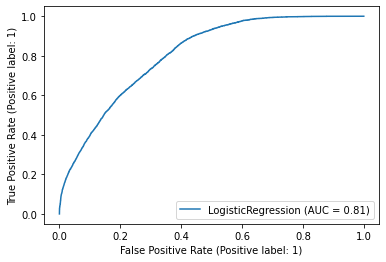

In [47]:
plot_roc_curve(logreg,X,y)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree=DecisionTreeClassifier()

In [50]:
treemodel=tree.fit(X,y)

In [51]:
treemodel.score(X,y)

0.999744562837542

In [52]:
hrtestpredict=treemodel.predict(hrtestdf)

In [53]:
pd.DataFrame(hrtestpredict).to_csv("tree.csv")

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cross_val_score(tree,X,y,cv=5)

array([0.89956212, 0.893815  , 0.89408867, 0.8993705 , 0.89371408])

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF=RandomForestClassifier(n_estimators=1000)

In [58]:
RFmodel=RF.fit(X,y)

In [59]:
RFmodel.score(X,y)

0.999744562837542

In [60]:
RFpredict=RFmodel.predict(X)

In [61]:
pd.crosstab(y,RFpredict)

col_0,0,1
row_0,,
0,50140,0
1,14,4654


In [62]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00      4668

    accuracy                           1.00     54808
   macro avg       1.00      1.00      1.00     54808
weighted avg       1.00      1.00      1.00     54808



In [63]:
cross_val_score(RF,X,y,cv=5)

array([0.93696406, 0.93231162, 0.93331509, 0.93613721, 0.93367393])

In [65]:
print(list(zip(X.columns,RFmodel.feature_importances_)))

[('no_of_trainings', 0.024733978487582357), ('age', 0.1446632067896095), ('previous_year_rating', 0.05541833526901713), ('length_of_service', 0.11017042341257811), ('KPIs_met >80%', 0.04706580851108596), ('awards_won?', 0.03002741816220603), ('avg_training_score', 0.2966136930936523), ('department', 0.09957383882703505), ('region', 0.12148248808000624), ('education', 0.015686653612407796), ('gender', 0.023565270169980883), ('recruitment_channel', 0.030998885584838556)]


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [68]:
gbmmodel=gbm.fit(X,y)

In [69]:
gbmmodel.score(X,y)

0.948784848927164

In [70]:
gbmpredict=gbmmodel.predict(X)

In [71]:
pd.crosstab(y,gbmpredict)

col_0,0,1
row_0,,
0,50054,86
1,2721,1947


In [72]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     50140
           1       0.96      0.42      0.58      4668

    accuracy                           0.95     54808
   macro avg       0.95      0.71      0.78     54808
weighted avg       0.95      0.95      0.94     54808



C:\Users\Omprakash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


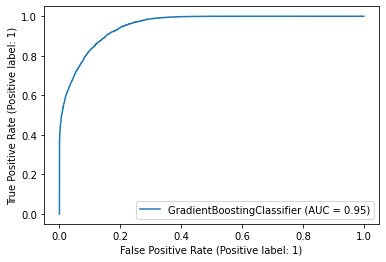

In [76]:
plot_roc_curve(gbm,X,y)